In [149]:
import os
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import datetime
import cv2

import os
import numpy as np
from pdb import set_trace

import colorsys
import random
from os.path import join



In [46]:


def plot_results(mean, std, path, name, save_figure=True):

    return fig

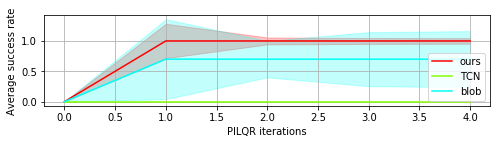

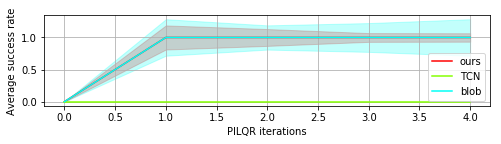

In [608]:

def plot_success_rate(logdir, itr, idx, label, type='np_cost'):
    offset = [0, -0.8, -0.3]
#     for i, logdir in enumerate(logdirs):
    filenames = [file for file in os.listdir(logdir) if type in file]
    filenames = sorted(filenames, key=lambda x: x.split('.')[0])
    mean = []
    std = []
    color = 'g'
    # save figure, if already exists then save under same name with current time stam           #fig.savefig(figure_path)

    for ii, file in enumerate(filenames):
        if ii > itr:
            break
        cur_itr_cost = np.load(join(logdir, file))
        mean.append(np.mean(np.sum(cur_itr_cost, axis=1), axis=0))
        std.append(np.std(np.sum(cur_itr_cost, axis=1), axis=0))
    scale = 1 / mean[0] * 10
    mean = -np.array(mean) * scale + offset[idx]
    std = np.array(std) * scale
    mean = (mean - np.min(mean)) / (np.max(mean) - np.min(mean))
    mean[np.where( mean > 0.5)] = 1
#     std /= (np.max(std) - np.min(std))
#     std /= 2
    if label == 'blob':
        std[np.where(std < 0.1)] = 0.3
    std[np.where(mean == 0)] = 0
    
    if label == 'TCN':
        std[:] = 0
        mean[:] = 0
        
    if 'bowl' in logdir:
#         std /= 3
        if 'blob' in label:
            mean[1:] -= 0.3
#               print(mean)
#     mean += np.max(mean)
    # plots the mean and 1 sigma interval of given mean and std array.
    # path is where to store and name is unique indicate of figure
    n = len(mean)
    epochs = np.arange(0, n, dtype=np.int32)
    colors = plt.cm.hsv(np.linspace(0, 1, 5)).tolist()
    plt.plot(epochs, mean, color=colors[idx], label=label)
    plt.fill_between(epochs, mean + std, mean - std, color=colors[idx], alpha=0.24)
    plt.xlabel('PILQR iterations')
    plt.ylabel('Average success rate')
    plt.grid(True)
    
plt.figure(figsize=(8,2))
plt.gcf().subplots_adjust(bottom=0.25)
logdir='/home/msieb/projects/gps-lfd/experiments/cube_and_bowl/data_files/goodone'
plot_success_rate(logdir, 4, idx=0, label='ours',type='np_cost')
logdir='/home/msieb/projects/gps-lfd/experiments/cube_and_bowl_tcn/data_files/baseline'
plot_success_rate(logdir, 4, idx=1, label='TCN',type='np_gt_cost')
logdir='/home/msieb/projects/gps-lfd/experiments/cube_and_bowl_blob/data_files/goodone'
plot_success_rate(logdir, 4, idx=2, label='blob',type='np_cost')

plt.legend(loc='lower right')
plt.savefig('/home/msieb/showcase/bowl_and_cube_final_successrate',bbox_inches='tight')

plt.figure(figsize=(8,2))
plt.gcf().subplots_adjust(bottom=0.25)
logdir='/home/msieb/projects/gps-lfd/experiments/red_cube_stacking/data_files/goodone'
plot_success_rate(logdir, 4, idx=0, label='ours',type='np_cost')
logdir='/home/msieb/projects/gps-lfd/experiments/red_cube_stacking_tcn/data_files/baseline'
plot_success_rate(logdir, 4, idx=1, label='TCN',type='np_gt_cost')
logdir='/home/msieb/projects/gps-lfd/experiments/red_cube_stacking_blob/data_files/goodone'
plot_success_rate(logdir, 4, idx=2, label='blob',type='np_cost')

plt.legend(loc='lower right')
plt.savefig('/home/msieb/showcase/red_cube_final_successrate',bbox_inches='tight')
plt.show()

In [136]:

def plot_costs(logdir, itr, idx, label, type='np_cost'):
    offset = [0, -0.8, -0.3]
#     for i, logdir in enumerate(logdirs):
    filenames = [file for file in os.listdir(logdir) if type in file]
    filenames = sorted(filenames, key=lambda x: x.split('.')[0])
    mean = []
    std = []
    color = 'g'
    # save figure, if already exists then save under same name with current time stam           #fig.savefig(figure_path)

    for ii, file in enumerate(filenames):
        if ii > itr:
            break
        cur_itr_cost = np.load(join(logdir, file))
        mean.append(np.mean(np.sum(cur_itr_cost, axis=1), axis=0))
        std.append(np.std(np.sum(cur_itr_cost, axis=1), axis=0))
    scale = 1 / mean[0] * 10
    mean = -np.array(mean) * scale + offset[idx]
    std = np.array(std) * scale
    # plots the mean and 1 sigma interval of given mean and std array.
    # path is where to store and name is unique indicate of figure
    n = len(mean)
    epochs = np.arange(1, n+1, dtype=np.int32)
    colors = plt.cm.hsv(np.linspace(0, 1, 5)).tolist()
    plt.plot(epochs, mean, color=colors[idx], label=label)
    plt.fill_between(epochs, mean + std, mean - std, color=colors[idx], alpha=0.24)
    plt.xlabel('PILQR iterations')
    plt.ylabel('Average return')
    plt.grid(True)


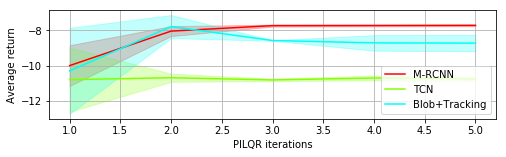

In [256]:
plt.figure(figsize=(8,2))

logdir='/home/msieb/projects/gps-lfd/experiments/cube_and_bowl/data_files/goodone'
plot_costs(logdir, 4, idx=0, label='M-RCNN',type='np_cost')
logdir='/home/msieb/projects/gps-lfd/experiments/cube_and_bowl_tcn/data_files/baseline'
plot_costs(logdir, 4, idx=1, label='TCN',type='np_gt_cost')
logdir='/home/msieb/projects/gps-lfd/experiments/cube_and_bowl_blob/data_files/goodone'
plot_costs(logdir, 4, idx=2, label='Blob+Tracking',type='np_cost')

plt.legend(loc='lower right')
plt.savefig('/home/msieb/showcase/bowl_and_cube_final')
plt.show()

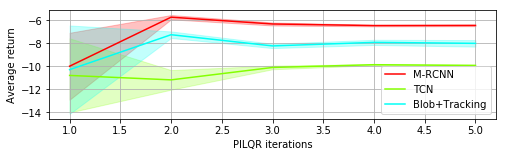

In [257]:
plt.figure(figsize=(8,2))

logdir='/home/msieb/projects/gps-lfd/experiments/red_cube_stacking/data_files/goodone'
plot_costs(logdir, 4, idx=0, label='M-RCNN',type='np_cost')
logdir='/home/msieb/projects/gps-lfd/experiments/red_cube_stacking_tcn/data_files/baseline'
plot_costs(logdir, 4, idx=1, label='TCN',type='np_gt_cost')
logdir='/home/msieb/projects/gps-lfd/experiments/red_cube_stacking_blob/data_files/goodone'
plot_costs(logdir, 4, idx=2, label='Blob+Tracking',type='np_cost')

plt.legend(loc='lower right')
plt.savefig('/home/msieb/showcase/red_cube_final')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


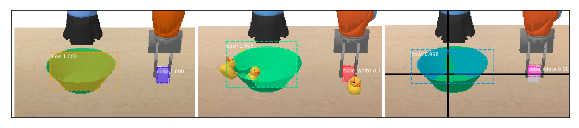

In [261]:
a = plt.imread('/home/msieb/showcase/mask_bowl_base.png')[120:-120, :]
b = plt.imread('/home/msieb/showcase/mask_bowl_duck.png')[110:-120, :-10]
c = plt.imread('/home/msieb/showcase/mask_bowl_stripe.png')[110:-120, :]

plt.figure(figsize=(10,10))

img = np.hstack([cv2.resize(a, (600, 350)), np.ones((350, 10, 3))*255, cv2.resize(b, (600, 350)),np.ones((350, 10, 3))*255, cv2.resize(c, (600, 350))])
plt.yticks([])
plt.xticks([])
plt.imshow(img)
plt.savefig('/home/msieb/showcase/occ_robust.jpg')


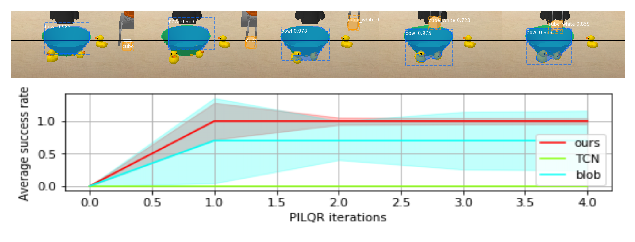

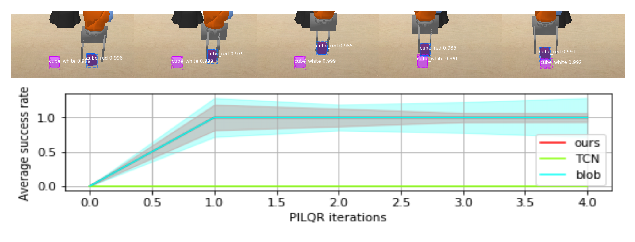

In [609]:
pilqr_bowl = plt.imread('/home/msieb/showcase/bowl_and_cube_final_successrate.png')[:,:,:-1]
pilqr_cube = plt.imread('/home/msieb/showcase/red_cube_final_successrate.png')[:,:,:-1]
# img_bowl = plt.imread('/home/msieb/showcase/bowl_and_cube_final_pics2.png')[10:-20,:, :]
# img_cube = plt.imread('/home/msieb/showcase/red_cube_final_pics2.png')[10:-20,:, :]

img_bowl_1 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/bowl_occ_2/rgb/mrcnn_output/16_00014.png')[280:-300, 280:-120]
img_bowl_2 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/bowl_occ_2/rgb/mrcnn_output/16_00024.png')[280:-300, 280:-120]
img_bowl_3 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/bowl_occ_2/rgb/mrcnn_output/16_00030.png')[280:-300, 280:-120]
img_bowl_4 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/bowl_occ_2/rgb/mrcnn_output/16_00041.png')[280:-300, 280:-120]
img_bowl_5 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/bowl_occ_2/rgb/mrcnn_output/16_00051.png')[280:-300, 280:-120]

pilqr_bowl.shape
# img_bowl_5.shape
# plt.imshow(img_bowl_1)
# img1 = np.hstack([np.ones((100, 70, 3))*255,cv2.resize(img_bowl_1, (449, 100)), np.ones((100, 57,3))*255])

# img1 = np.hstack([cv2.resize(img_bowl_1, (100, 100)),cv2.resize(img_bowl_2, (100, 100))])
img1 = np.hstack([np.ones((220, 1, 4)), img_bowl_1, img_bowl_2, img_bowl_3, img_bowl_4, img_bowl_5, np.ones((220, 1, 4))])
img1[250:260,:] = 0.8
# print(np.ones((220, 70, 4)).shape)
# print(img1.shape)
# print(pilqr_bowl.shape)
# plt.imshow(img1)
# img2 = np.hstack([np.ones((100, 70, 3))*255,cv2.resize(img_cube, (449, 100)), np.ones((100, 57,3))*255])
img1 = np.vstack([img1[:,:,:-1], cv2.resize(pilqr_bowl, (img1.shape[1],500))])
# img2 = np.vstack([img2, pilqr_cube])
plt.figure(figsize=(11,5))

plt.imshow(img1)
plt.yticks([])
plt.xticks([])
plt.axis('off')

plt.savefig('/home/msieb/showcase/bowl_fused_successrate.jpg',bbox_inches='tight')

img_cube_1 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/cube_4/rgb/mrcnn_output/0_00014.png')[280:-300, 280:-120]
img_cube_2 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/cube_4/rgb/mrcnn_output/0_00024.png')[280:-300, 280:-120]
img_cube_3 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/cube_4/rgb/mrcnn_output/0_00030.png')[280:-300, 280:-120]
img_cube_4 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/cube_4/rgb/mrcnn_output/0_00041.png')[280:-300, 280:-120]
img_cube_5 = plt.imread('/home/msieb/projects/gps-lfd/demo_data/cube_4/rgb/mrcnn_output/0_00054.png')[280:-300, 280:-120]
img2 = np.hstack([np.ones((220, 1, 4)), img_cube_1, img_cube_2, img_cube_3, img_cube_4, img_cube_5, np.ones((220, 1, 4))])
# print(img_cube_1.shape)
# print(pilqr_cube.shape)
img2 = np.vstack([img2[:,:,:-1], cv2.resize(pilqr_cube, (img2.shape[1],500))])
plt.figure(figsize=(11,5))

plt.imshow(img2)


plt.yticks([])
plt.xticks([])
plt.axis('off')
plt.savefig('/home/msieb/showcase/cube_fused_successrate.jpg',bbox_inches='tight')




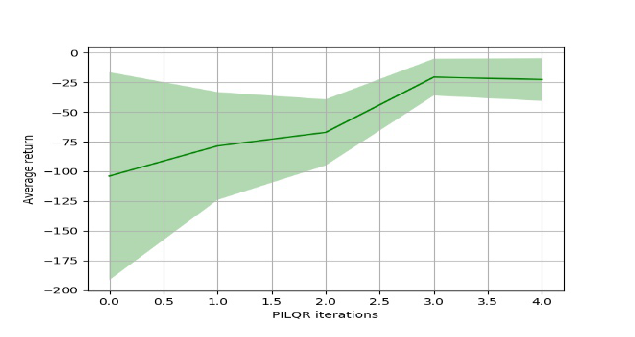

In [283]:
plt.figure(figsize=(11,11))

pilqr_real = plt.imread('/home/msieb/showcase/pilqr_real.jpg')
plt.yticks([])
plt.xticks([])
plt.axis('off')
plt.imshow(cv2.resize(pilqr_real, (640,330)))
plt.savefig('/home/msieb/showcase/pilqr_real_resized.jpg')


/home/msieb/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'x2')

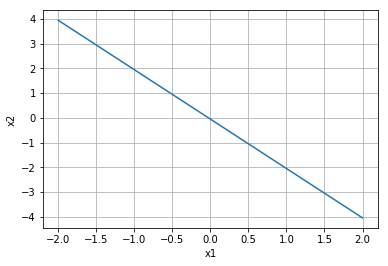

In [588]:
x = np.linspace(-2,2,100)
plt.plot(x,-2*x-1)
plt.grid('on')
plt.xlabel('x1')
plt.ylabel('x2')